Agenda
    Clustering
        K-Means Clustering
        Dataset: Mall Customers Dataset (available on Kaggle).

            Load and preprocess the dataset (scale features).
            Use the Elbow Method to determine the optimal number of clusters.
            Train the KMeans model from sklearn.cluster.
            Visualize clusters using a scatter plot.
            Evaluate: Use the Silhouette Score to assess the quality of clustering.


In [27]:
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('./datasets/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# One Hot Encoder for gender colummn
df = pd.get_dummies(df,columns=['Gender'])

In [8]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [15]:
#Scaling data
features_to_scale = ['Age','Annual Income (k$)','Spending Score (1-100)']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_to_scale])
scaled_df = pd.DataFrame(scaled_features,columns=features_to_scale)
data_scaled = pd.concat([df[['CustomerID','Gender_Female','Gender_Male']],scaled_df],axis=1) 
data_scaled.head()

,CustomerID,Gender_Female,Gender_Male,Age,Annual Income (k$),Spending Score (1-100)
0,1,False,True,-1.424569,-1.738999,-0.434801
1,2,False,True,-1.281035,-1.738999,1.195704
2,3,True,False,-1.352802,-1.700830,-1.715913
3,4,True,False,-1.137502,-1.700830,1.040418
4,5,True,False,-0.563369,-1.662660,-0.395980


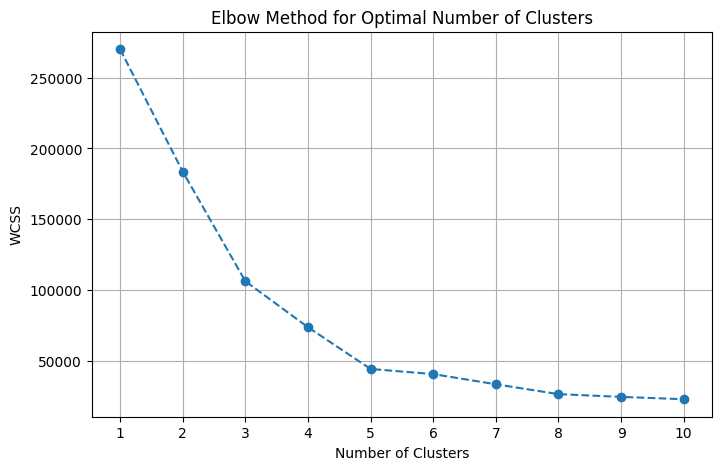

In [23]:
# Use the Elbow Method to determine the optimal number of clusters.
features = [
    'Annual Income (k$)',
    'Spending Score (1-100)'
]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(df[features])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

#optimal n_clusters = 5

/tmp/ipykernel_11568/4293121530.py:12: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'],
/tmp/ipykernel_11568/4293121530.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


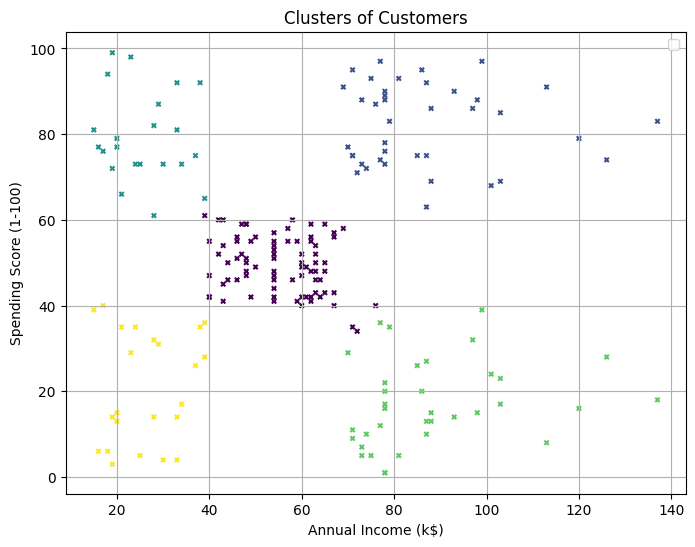

In [31]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)

kmeans.fit(features)

labels = kmeans.labels_
df['Clusters'] = labels


plt.figure(figsize=(8, 6))
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], 
            c=labels, cmap='viridis', marker='x', s=10, edgecolor='k')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
#             s=200, c='red', label='Centroids', marker='X')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [28]:
#Using silhouette score to evaluate clustering performance of multiple k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(features)
    score = silhouette_score(features, labels)
    print(f"For n_clusters = {k}, Silhouette Score = {score:.2f}")

For n_clusters = 2, Silhouette Score = 0.40
For n_clusters = 3, Silhouette Score = 0.47
For n_clusters = 4, Silhouette Score = 0.49
For n_clusters = 5, Silhouette Score = 0.55
For n_clusters = 6, Silhouette Score = 0.51
For n_clusters = 7, Silhouette Score = 0.50
For n_clusters = 8, Silhouette Score = 0.50
For n_clusters = 9, Silhouette Score = 0.46
For n_clusters = 10, Silhouette Score = 0.44
